# 0. Import libraries
## 0.1. Import public libraries

In [1]:
import copy
import glob
import importlib
import time
import os
import shutil
import sys
from importlib import reload

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from tqdm.notebook import tqdm

#import time

## 0.2. Import our library

In [2]:
import celloracle as co
from celloracle.applications import Oracle_development_module, Oracle_systematic_analysis_helper
co.__version__

/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str

'0.14.0'

## 0.3. Plotting parameter setting

In [3]:
#plt.rcParams["font.family"] = "arial"
plt.rcParams["figure.figsize"] = [5,5]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['pdf.fonttype']=42

%matplotlib inline

## 1. Load systematic simulation results


In [4]:
# Make Oracle development module class to load data
file_path = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118_cicero_output/12_TDR118_NMP_in_silico_KO.celloracle.hdf5"
dev = Oracle_development_module()
dev.set_hdf_path(path=file_path)

In [5]:
# If we use the function below, we can see information of the saved data
info = dev.get_hdf5_info()

print("Genes\n", info["gene_list"])

print("\nSimulation conditions\n", info["misc_list"])

Genes
 ['alx1' 'alx4a' 'alx4b' 'ar' 'arid3c' 'arid5b' 'arxa' 'arxb' 'ascl1a'
 'atf3' 'barhl1b' 'barhl2' 'barx1' 'bcl11aa' 'bcl11ab' 'bhlha15' 'bhlhe22'
 'cdx4' 'cebpa' 'cebpb' 'cebpd' 'creb3l3a' 'creb3l3b' 'creb5b' 'cux2b'
 'dlx1a' 'dlx2a' 'dlx2b' 'dlx3b' 'dlx4a' 'dlx5a' 'dmbx1a' 'dmrt2a'
 'dmrt2b' 'dmrta2' 'drgx' 'ebf1b' 'ebf2' 'ebf3a' 'ebf3b' 'egr2a' 'egr2b'
 'egr3' 'egr4' 'elk3' 'emx3' 'en1a' 'en1b' 'en2a' 'en2b' 'esr2a' 'esrrga'
 'etv1' 'etv2' 'etv4' 'evx2' 'fezf1' 'fezf2' 'fli1a' 'fli1b' 'fosaa'
 'fosb' 'foxa2' 'foxd1' 'foxd3' 'foxd5' 'foxf1' 'foxg1a' 'foxi2' 'foxi3a'
 'foxi3b' 'foxj1a' 'foxn3' 'foxo3b' 'foxp1b' 'foxp4' 'gata1a' 'gata2a'
 'gata5' 'gata6' 'gbx1' 'gbx2' 'gcm2' 'gfi1aa' 'gfi1ab' 'gfi1b' 'gli2a'
 'gli3' 'grhl1' 'grhl2b' 'gsx1' 'gsx2' 'hand2' 'her9' 'hey1' 'hey2' 'hic1'
 'hmga1a' 'hmga2' 'hmx2' 'hmx3a' 'hnf1ba' 'hnf1bb' 'hnf4a' 'hoxa10b'
 'hoxa11b' 'hoxa4a' 'hoxa9b' 'hoxb3a' 'hoxb6b' 'hoxb7a' 'hoxb9a' 'hoxc10a'
 'hoxc11a' 'hoxc13b' 'hoxc1a' 'hoxc3a' 'hoxc6b' 'hoxc8a' '

## 1.1 Let's check one simulation result

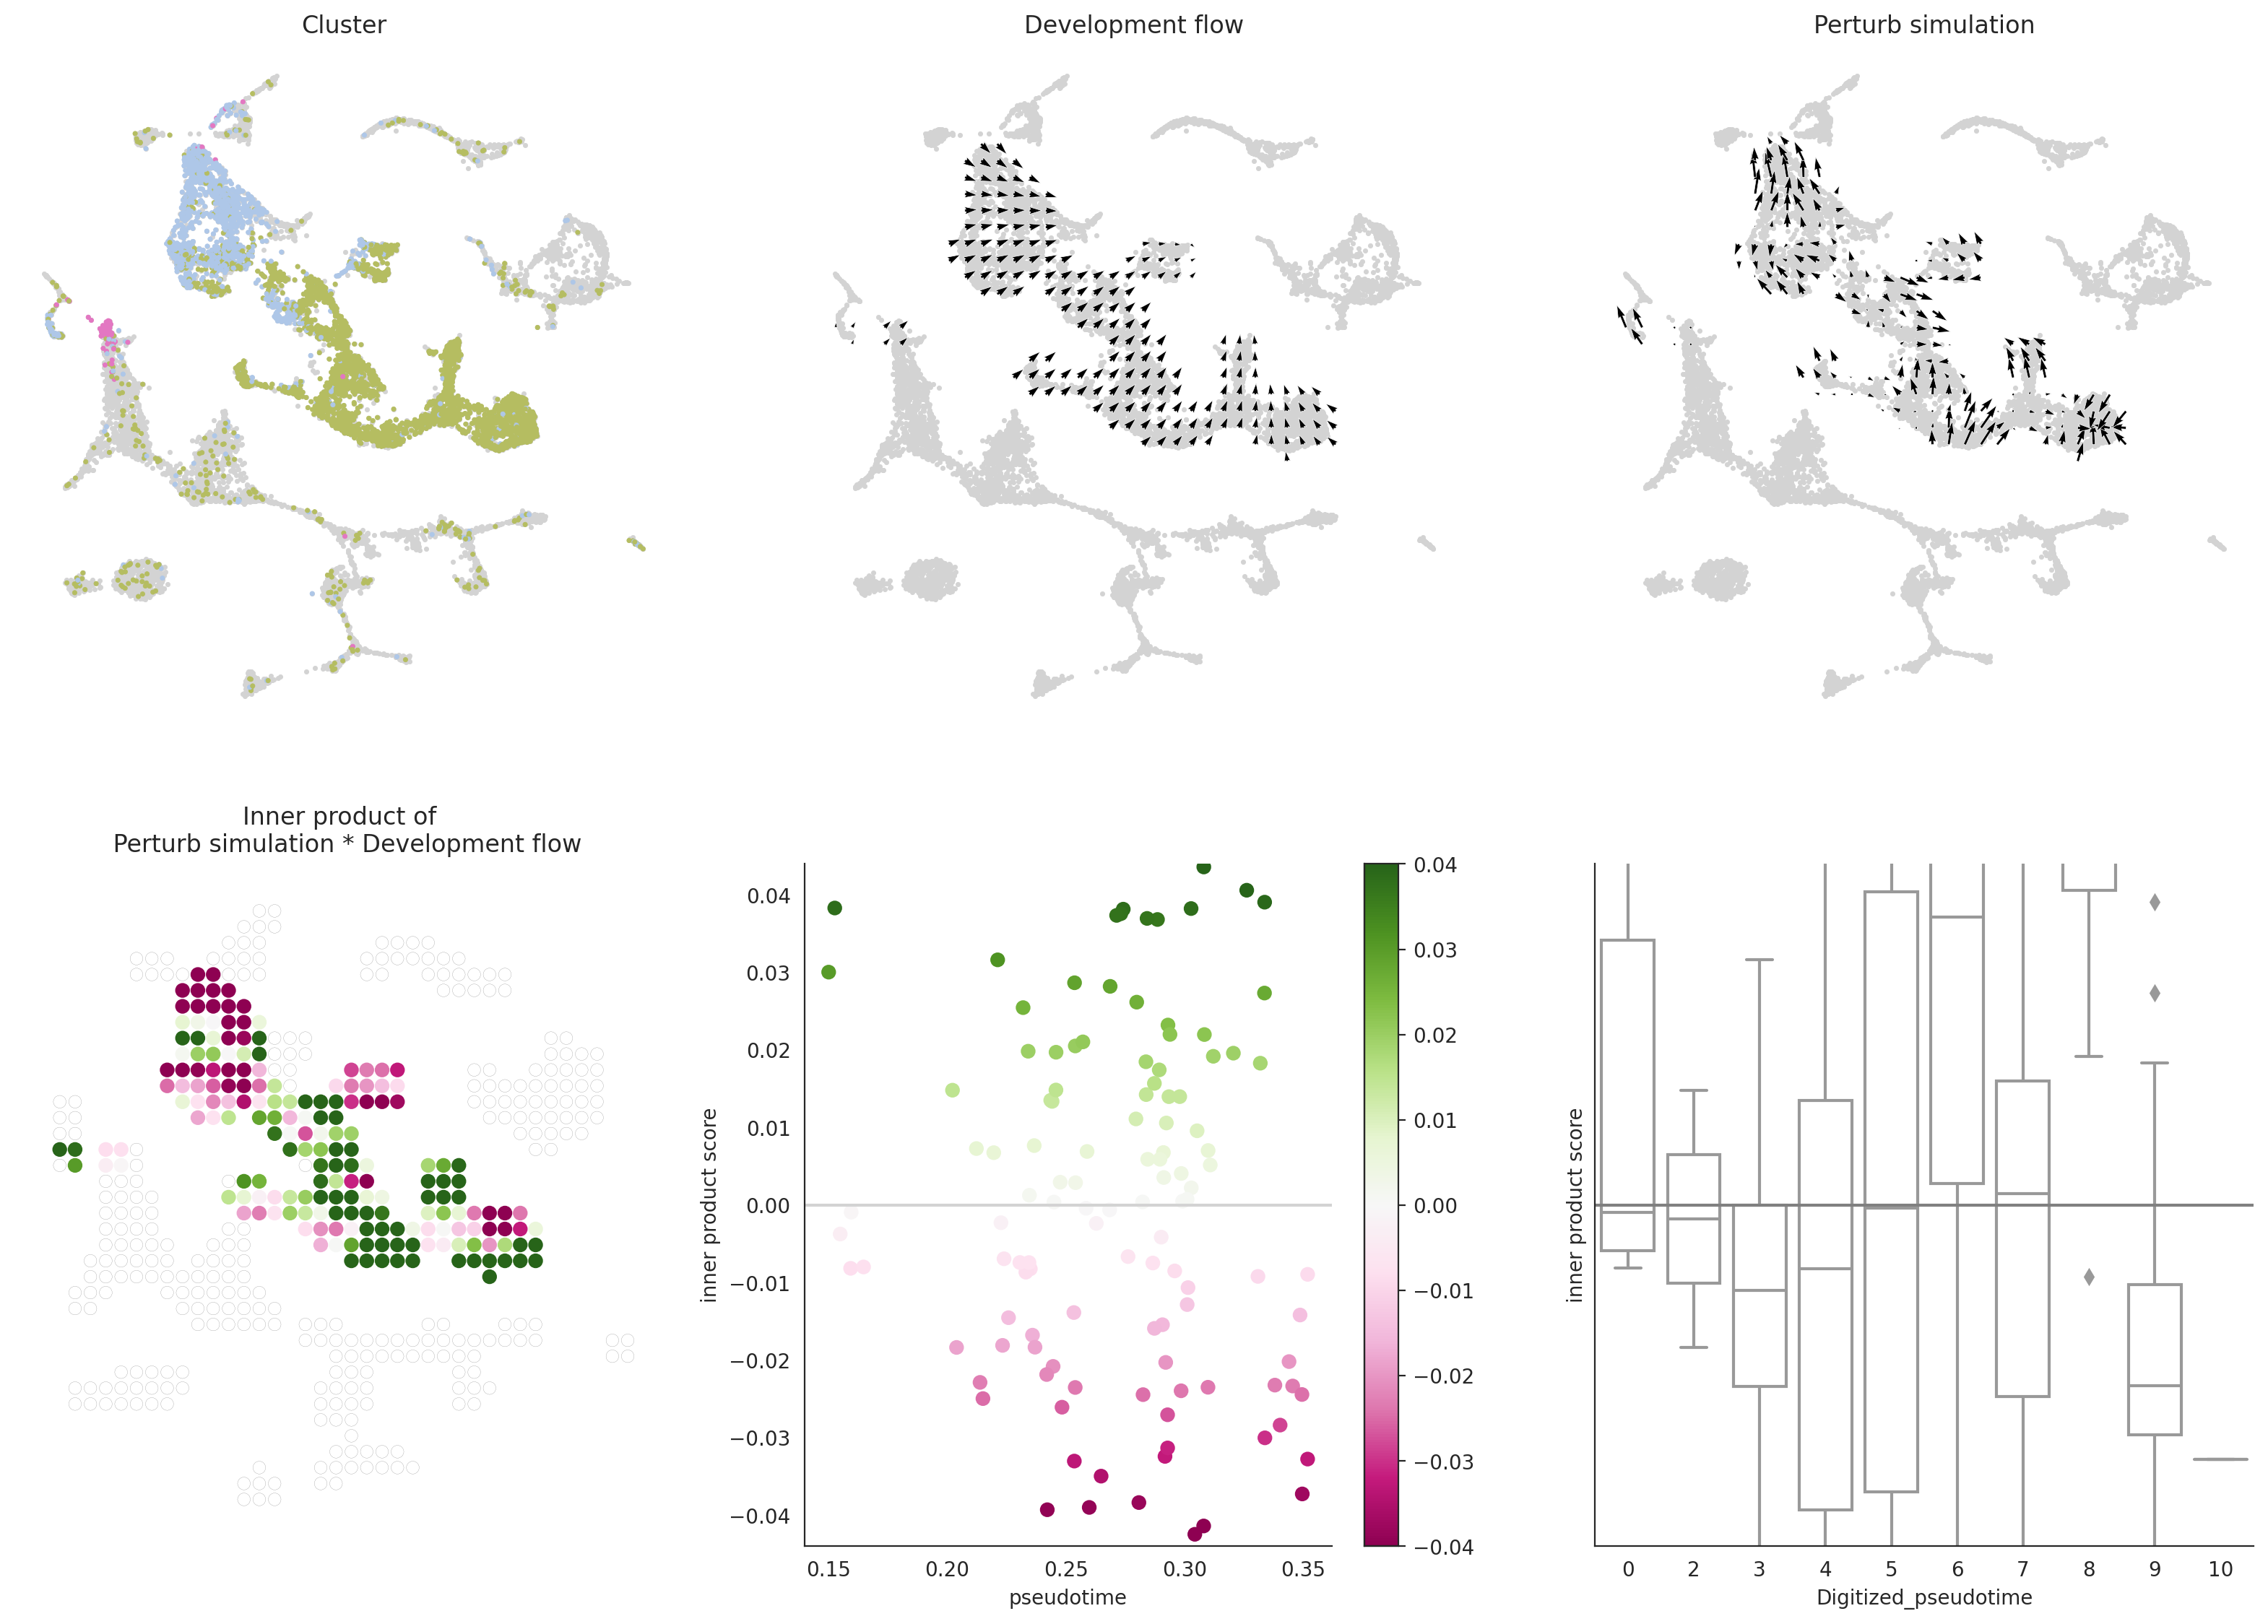

In [8]:
# Load one results
dev.load_hdf5(gene="pax6a", misc="Lineage_neuroecto")

# Visualize result
# dev.visualize_development_module_layout_0(s=5, scale_for_simulation=0.5, s_grid=50,
#                                           scale_for_pseudotime=50, vm=0.04)
# Visualize result
dev.visualize_development_module_layout_0(s=5, scale_for_simulation=5, s_grid=40,
                                          scale_for_pseudotime=40, vm=0.04)

# 2. Systematic analysis using Interactive UI

Next, we will analyze systematic KO results. Here we can use `Oracle_systematic_analysis_helper` class.
Please install jupyter widgets if you got an error. https://ipywidgets.readthedocs.io/en/stable/


In [9]:
# Load data with Oracle_systematic_analysis_helper.
helper = Oracle_systematic_analysis_helper(hdf5_file_path=file_path)

## 2.1. Sorting TFs based on negative score.

You can get list of negative PS score.
In some case, you may want to focus on specific developmental time. Pleasae select pseudotime using the widget below. 


In [10]:
helper.interactive_sort_TFs_by_neagative_ip()

Top 20 in Lineage_meso


interactive(children=(Dropdown(description='misc', options=('Lineage_meso', 'Lineage_neuroecto', 'Whole_cells'…

In the default setting, the developmental trajectory has been divided into 10 bins. If you are not sure about the selected pseudotime, you can visualize them using `plot_selected_pseudotime_on_grid` function as follows.

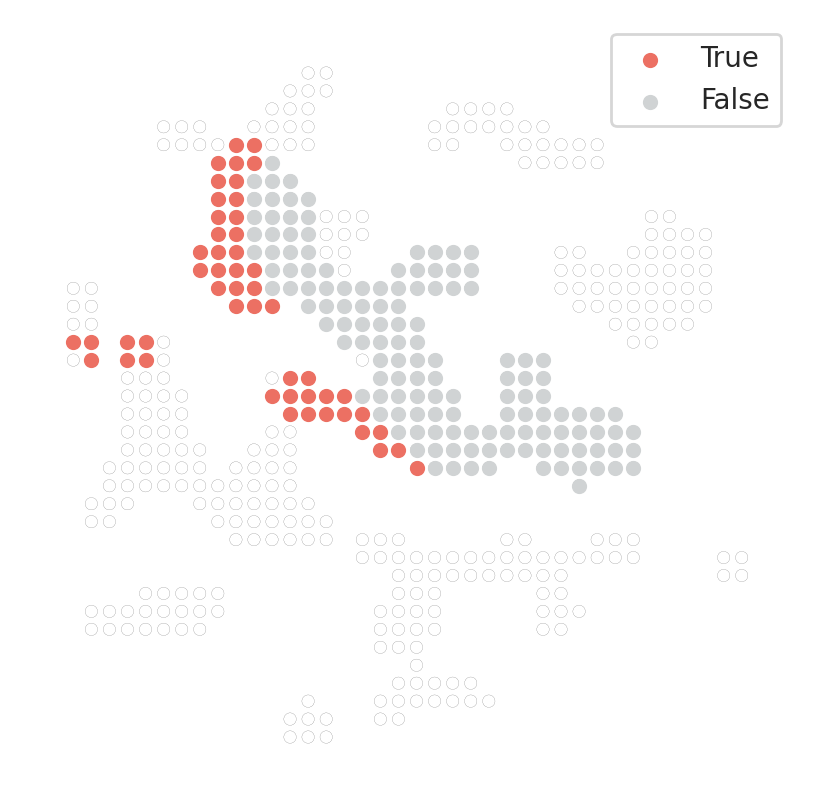

In [12]:
dev.plot_selected_pseudotime_on_grid(pseudotime_selected=[0, 1, 2, 3, 4])

## You can also get gene list as a dataframe as follows.

In [31]:
ps = helper.calculate_negative_ps_p_value(misc="Lineage_meso", pseudotime=None)

  0%|          | 0/309 [00:00<?, ?it/s]

In [32]:
ps

gene    ps_sum
0      foxp4  3.679982
1     foxp1b  3.013255
2       rfx4  2.460876
3      meis3  2.429023
4     meis1a  2.380764
..       ...       ...
304    mitfb  0.000307
305     egr3  0.000301
306  bcl11aa  0.000295
307    lhx2a  0.000111
308     evx2  0.000015

[309 rows x 2 columns]

In [35]:
## Make plot like fig1 f

ps_me = helper.calculate_negative_ps_p_value(misc="Lineage_meso", pseudotime=None)
ps_gm = helper.calculate_negative_ps_p_value(misc="Lineage_neuroecto", pseudotime=None)

ps_me.ps_sum = np.log1p(ps_me.ps_sum) # Log transform
ps_gm.ps_sum = np.log1p(ps_gm.ps_sum) # Log transform

ps_me = ps_me.rename(columns={"ps_sum": "ps_sum_me"})
ps_gm = ps_gm.rename(columns={"ps_sum": "ps_sum_ne"})

ps_merged = pd.merge(ps_me, ps_gm, on="gene")

  0%|          | 0/309 [00:00<?, ?it/s]

  0%|          | 0/309 [00:00<?, ?it/s]

In [46]:
ps_merged.iterrows

<bound method DataFrame.iterrows of         gene  ps_sum_me  ps_sum_ne
0      foxp4   1.543294   1.474392
1     foxp1b   1.389603   1.262555
2       rfx4   1.241522   1.413524
3      meis3   1.232275   1.229756
4     meis1a   1.218102   1.026857
..       ...        ...        ...
304    mitfb   0.000307   0.027722
305     egr3   0.000301   0.001981
306  bcl11aa   0.000295   0.183161
307    lhx2a   0.000111   0.027493
308     evx2   0.000015   0.009772

[309 rows x 3 columns]>

Text(0.5, 1.0, 'sum of negative PS for each lineage')

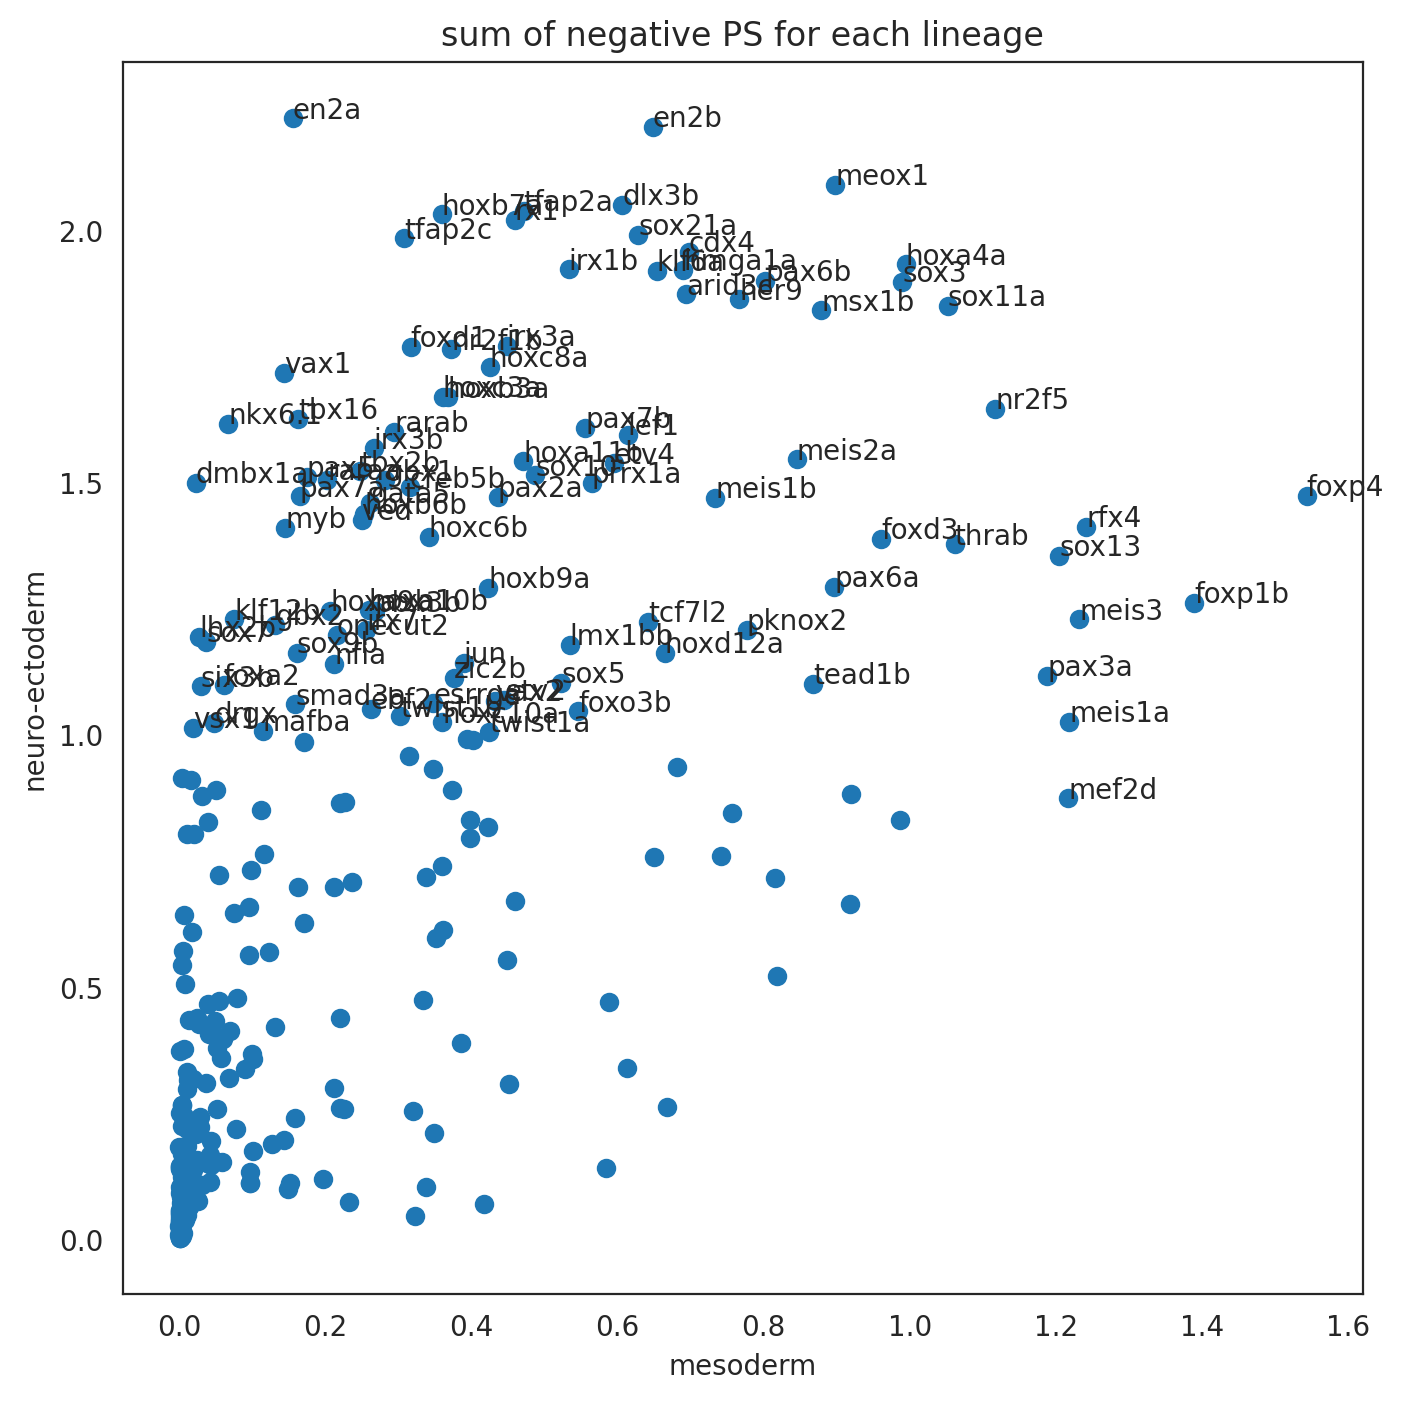

In [65]:
fig, ax = plt.subplots(figsize=[8, 8])
ax.scatter(ps_merged.ps_sum_me, ps_merged.ps_sum_ne)
for idx, (gene, x, y) in ps_merged.iterrows():
    if x>=1 or y>=1:
        ax.text(s=gene, x=x, y=y)
    
# ax.set_xlim([-0.1, 3])
# ax.set_ylim([-0.1, 3])
ax.set_xlabel("mesoderm")
ax.set_ylabel("neuro-ectoderm")
ax.set_title("sum of negative PS for each lineage")

In [72]:
figpath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/in_silico_KO/"

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 39 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'P', 'S', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'x', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 51, 54, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 44 glyphs after

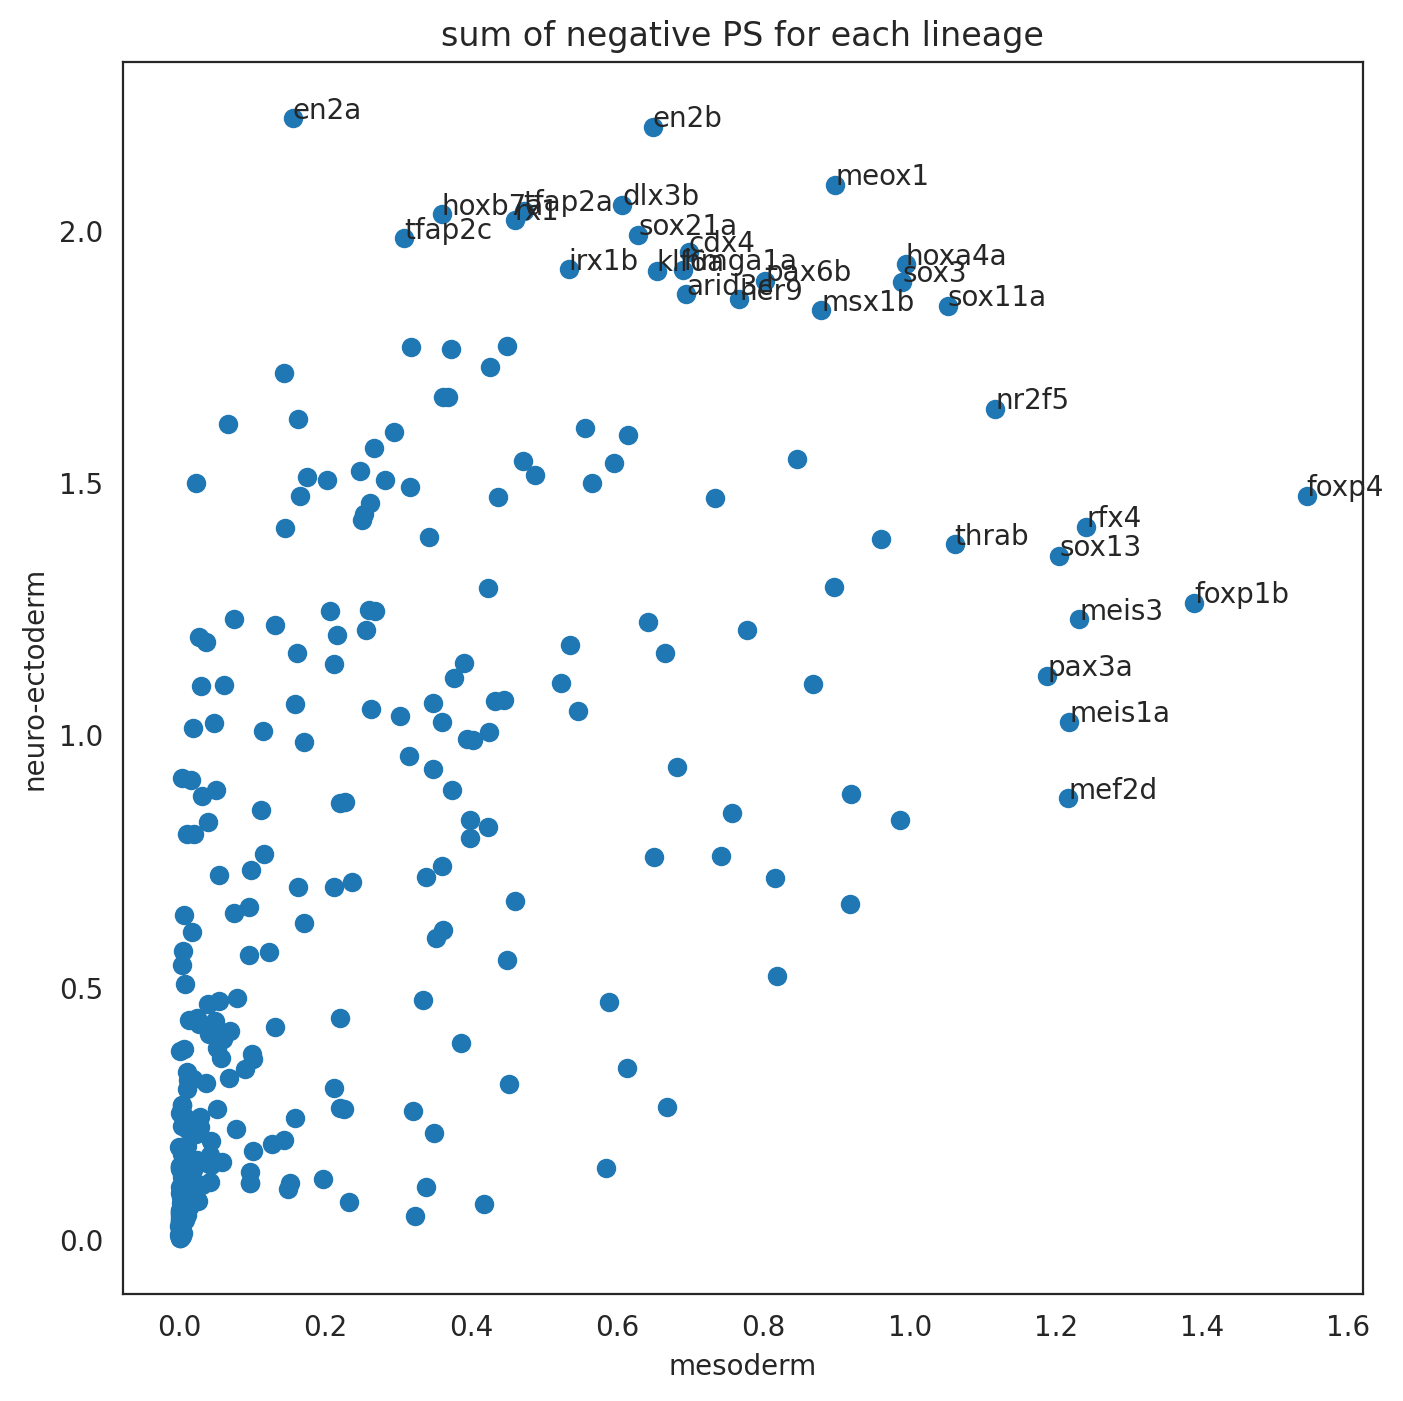

In [73]:
fig, ax = plt.subplots(figsize=[8, 8])
ax.scatter(ps_merged.ps_sum_me, ps_merged.ps_sum_ne)
for idx, (gene, x, y) in ps_merged.iterrows():
    if x>=1 or y>=1.8:
        ax.text(s=gene, x=x, y=y)
    
# ax.set_xlim([-0.1, 3])
# ax.set_ylim([-0.1, 3])
ax.set_xlabel("mesoderm")
ax.set_ylabel("neuro-ectoderm")
ax.set_title("sum of negative PS for each lineage")
plt.savefig(figpath + "scatter_sum_negative_PS_meso_neuroecto.pdf")
plt.savefig(figpath + "scatter_sum_negative_PS_meso_neuroecto.png")

## Checking the in silico perturbation result for genes:

Based on the in silico screening above, let's look at the perturbation score on "UMAP" for a couple of candidate genes with high PS sum

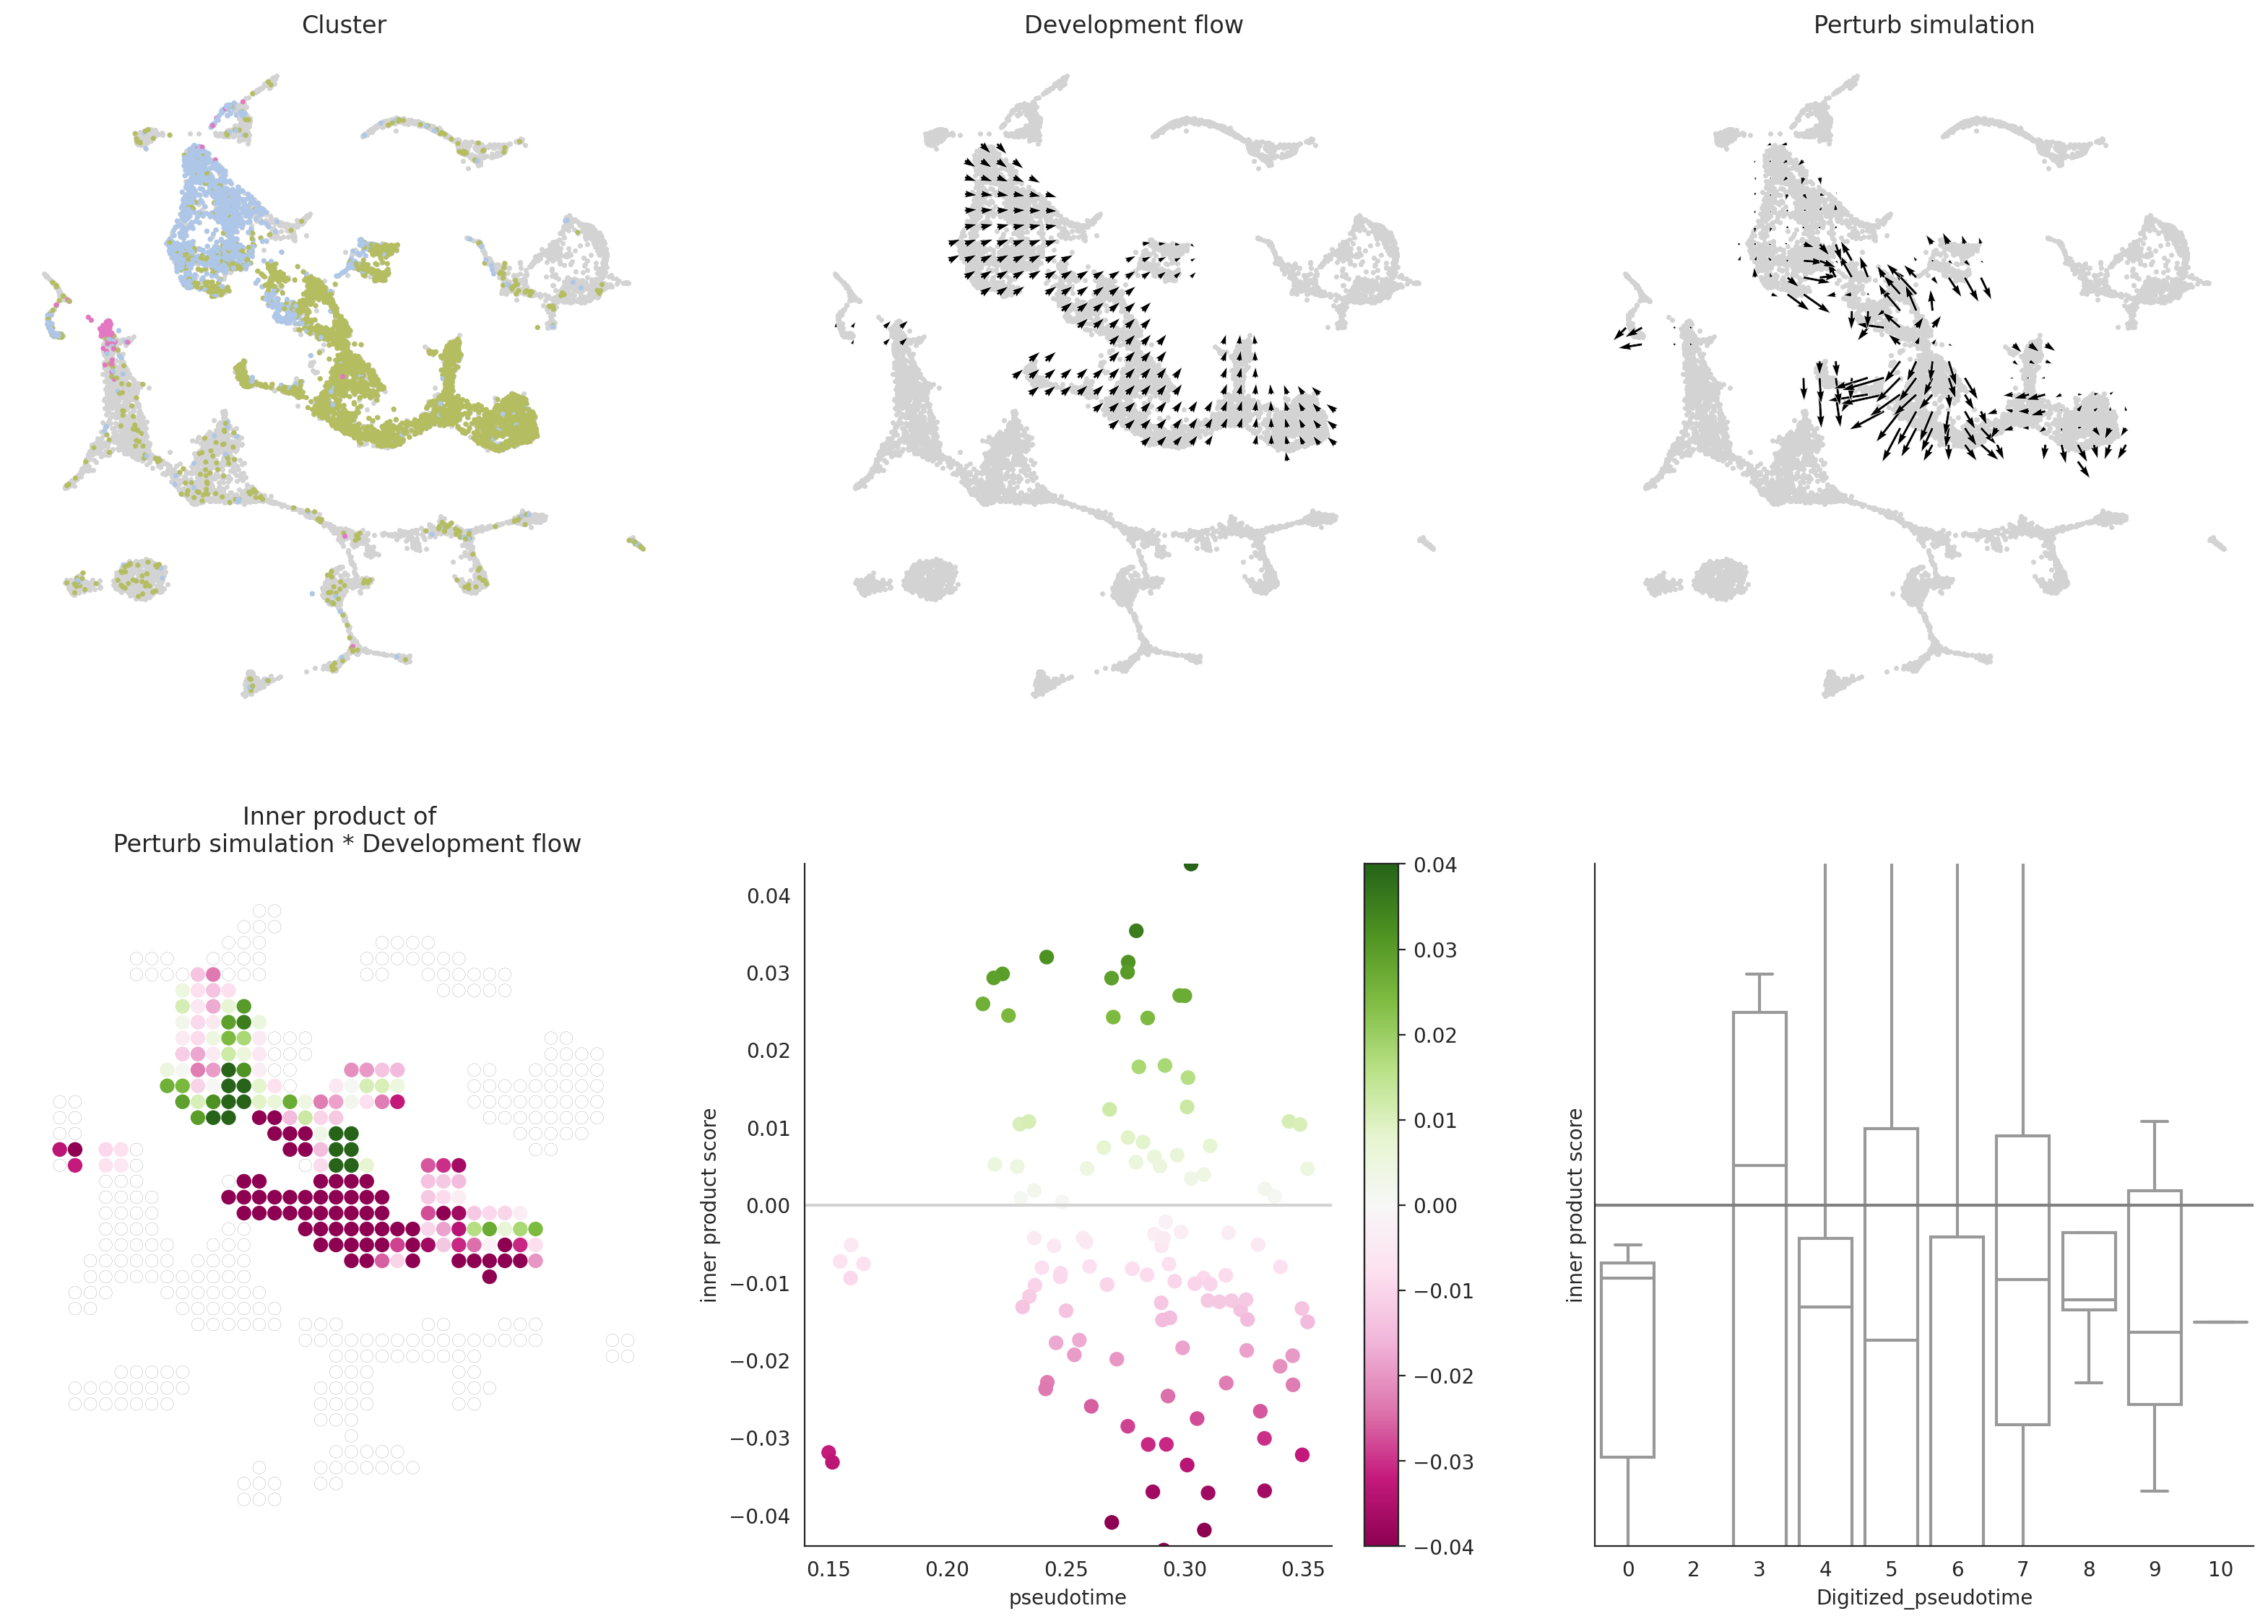

In [74]:
# neuro-ectoderm
# identify genes that have higher PS sum in neuroectoderm lineage compared to mesoderm lineage (or whole cells, as a baseline)

# Load one results
dev.load_hdf5(gene="en2a", misc="Lineage_neuroecto")

# Visualize result
# dev.visualize_development_module_layout_0(s=5, scale_for_simulation=0.5, s_grid=50,
#                                           scale_for_pseudotime=50, vm=0.04)
# Visualize result
dev.visualize_development_module_layout_0(s=5, scale_for_simulation=5, s_grid=40,
                                          scale_for_pseudotime=40, vm=0.04)


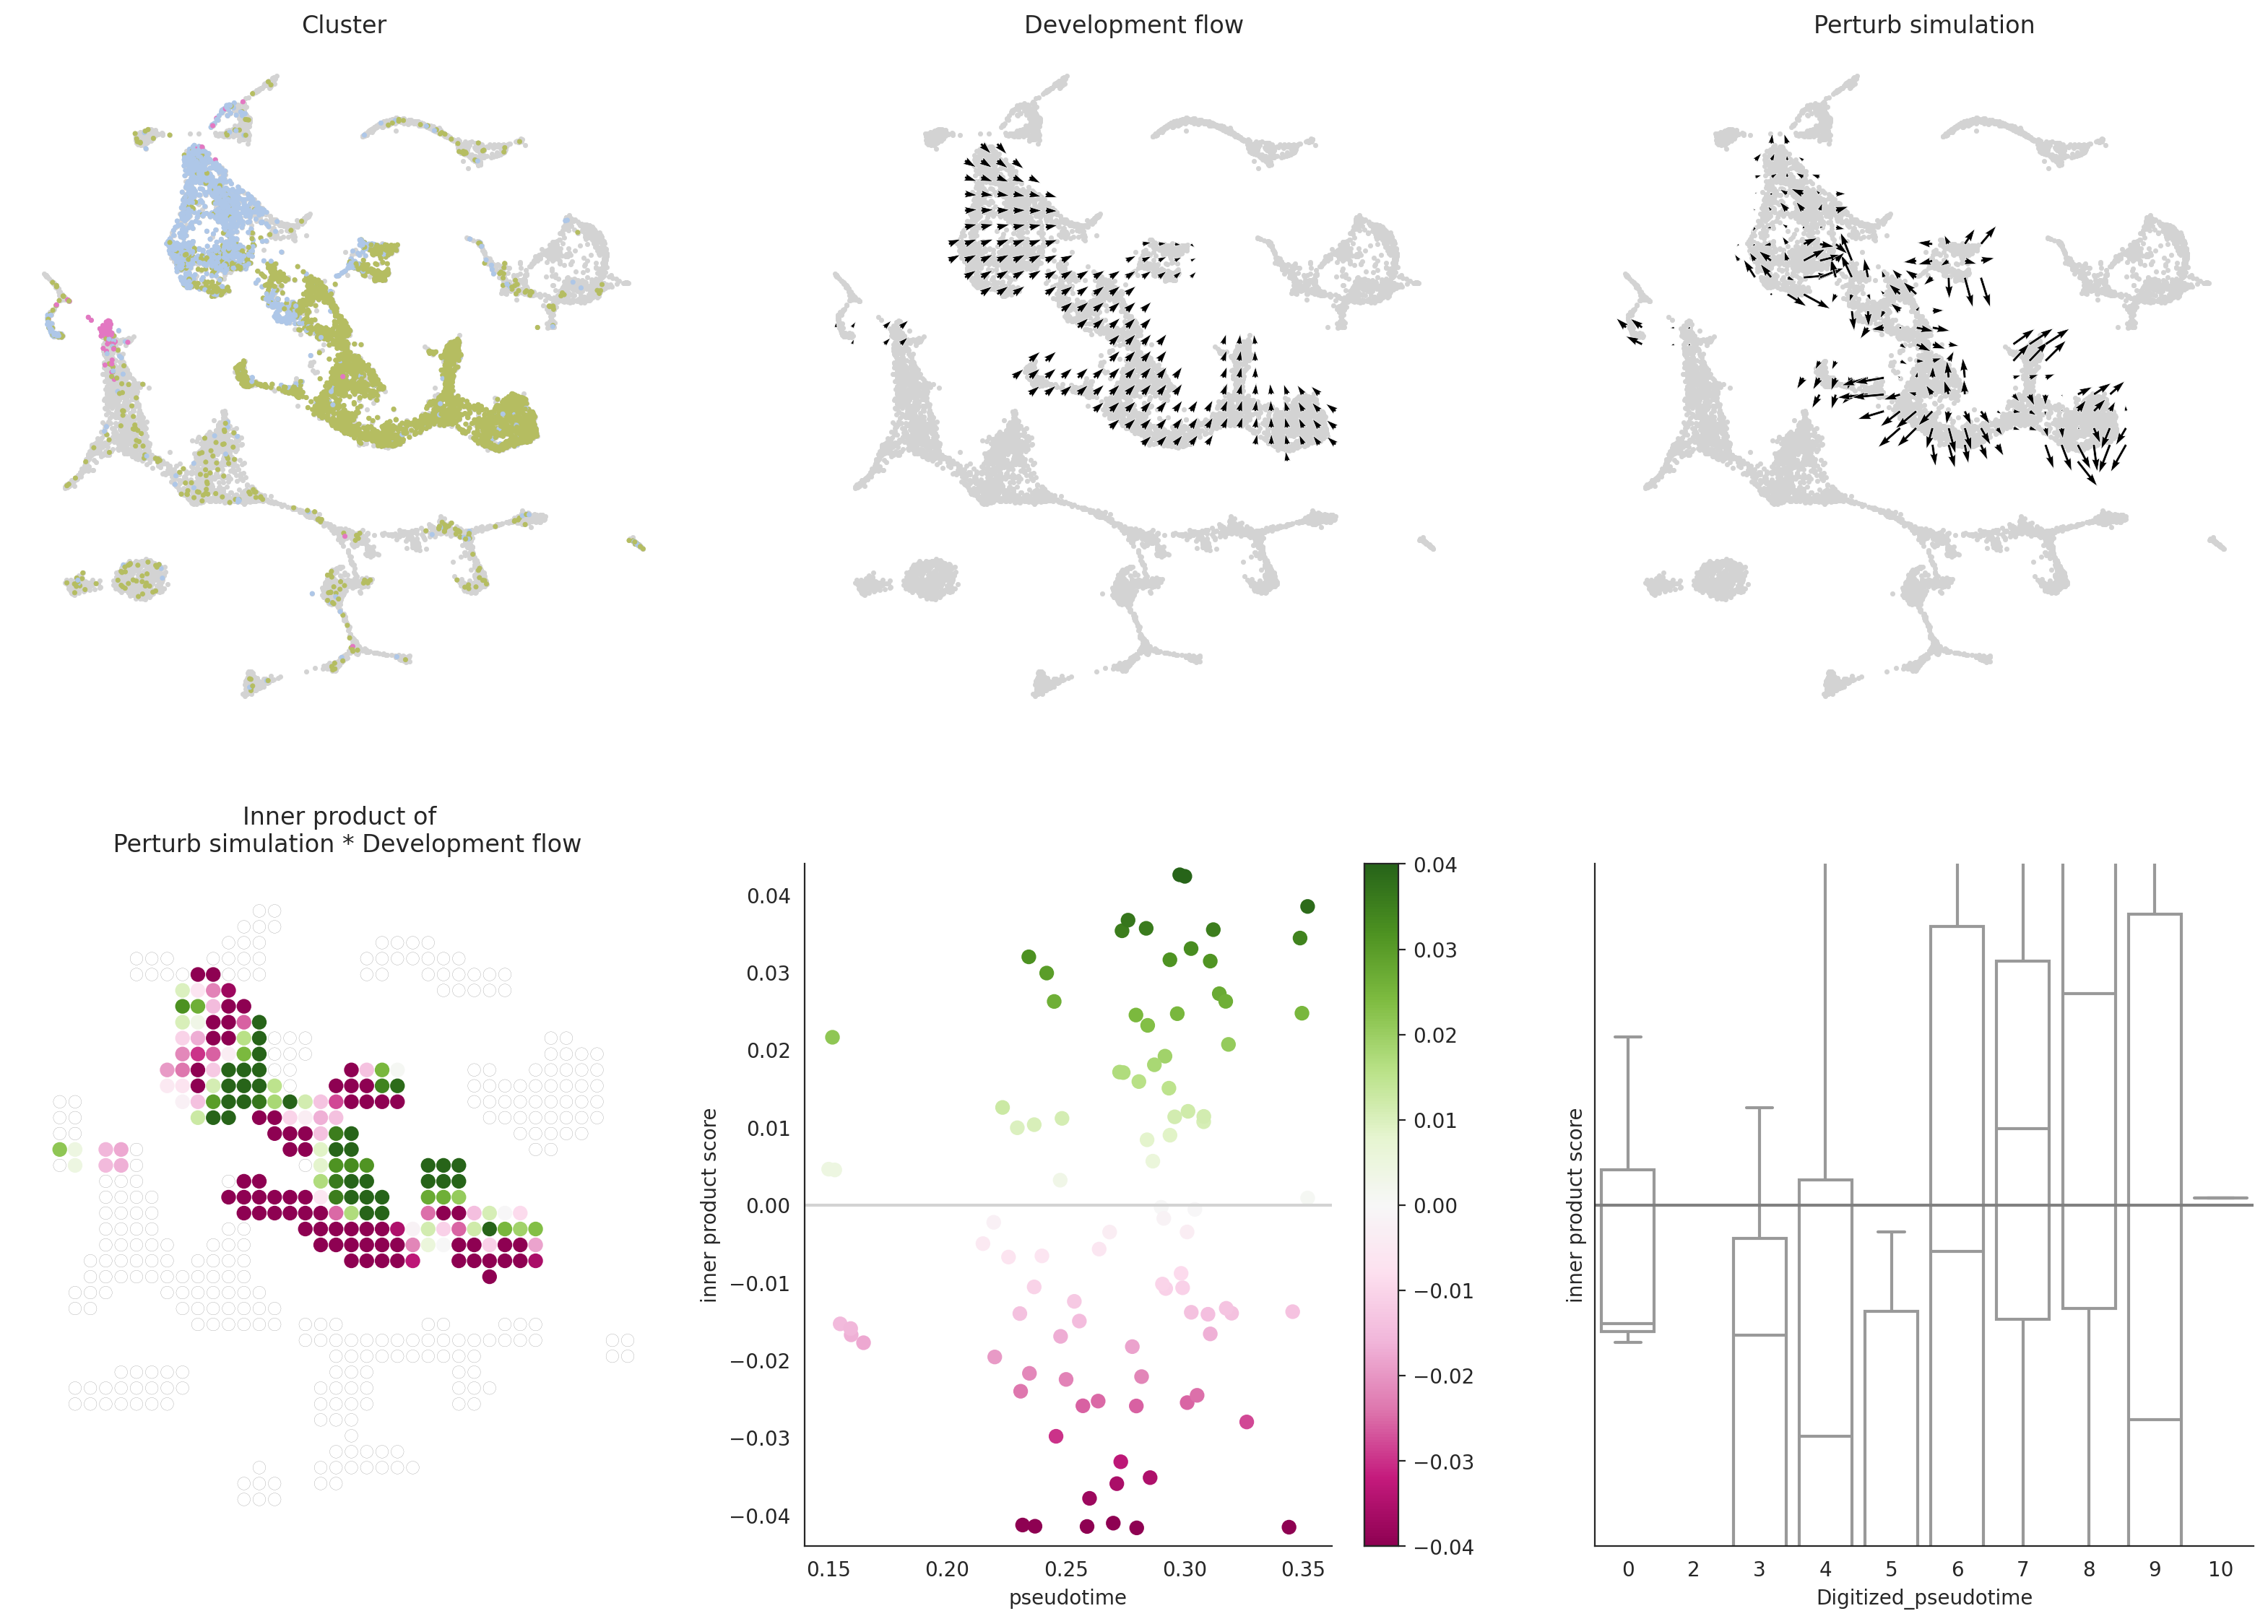

In [76]:
# neuro-ectoderm
# identify genes that have higher PS sum in neuroectoderm lineage compared to mesoderm lineage (or whole cells, as a baseline)

# Load one results
dev.load_hdf5(gene="sox21a", misc="Lineage_neuroecto")

# Visualize result
# dev.visualize_development_module_layout_0(s=5, scale_for_simulation=0.5, s_grid=50,
#                                           scale_for_pseudotime=50, vm=0.04)
# Visualize result
dev.visualize_development_module_layout_0(s=5, scale_for_simulation=5, s_grid=40,
                                          scale_for_pseudotime=40, vm=0.04)

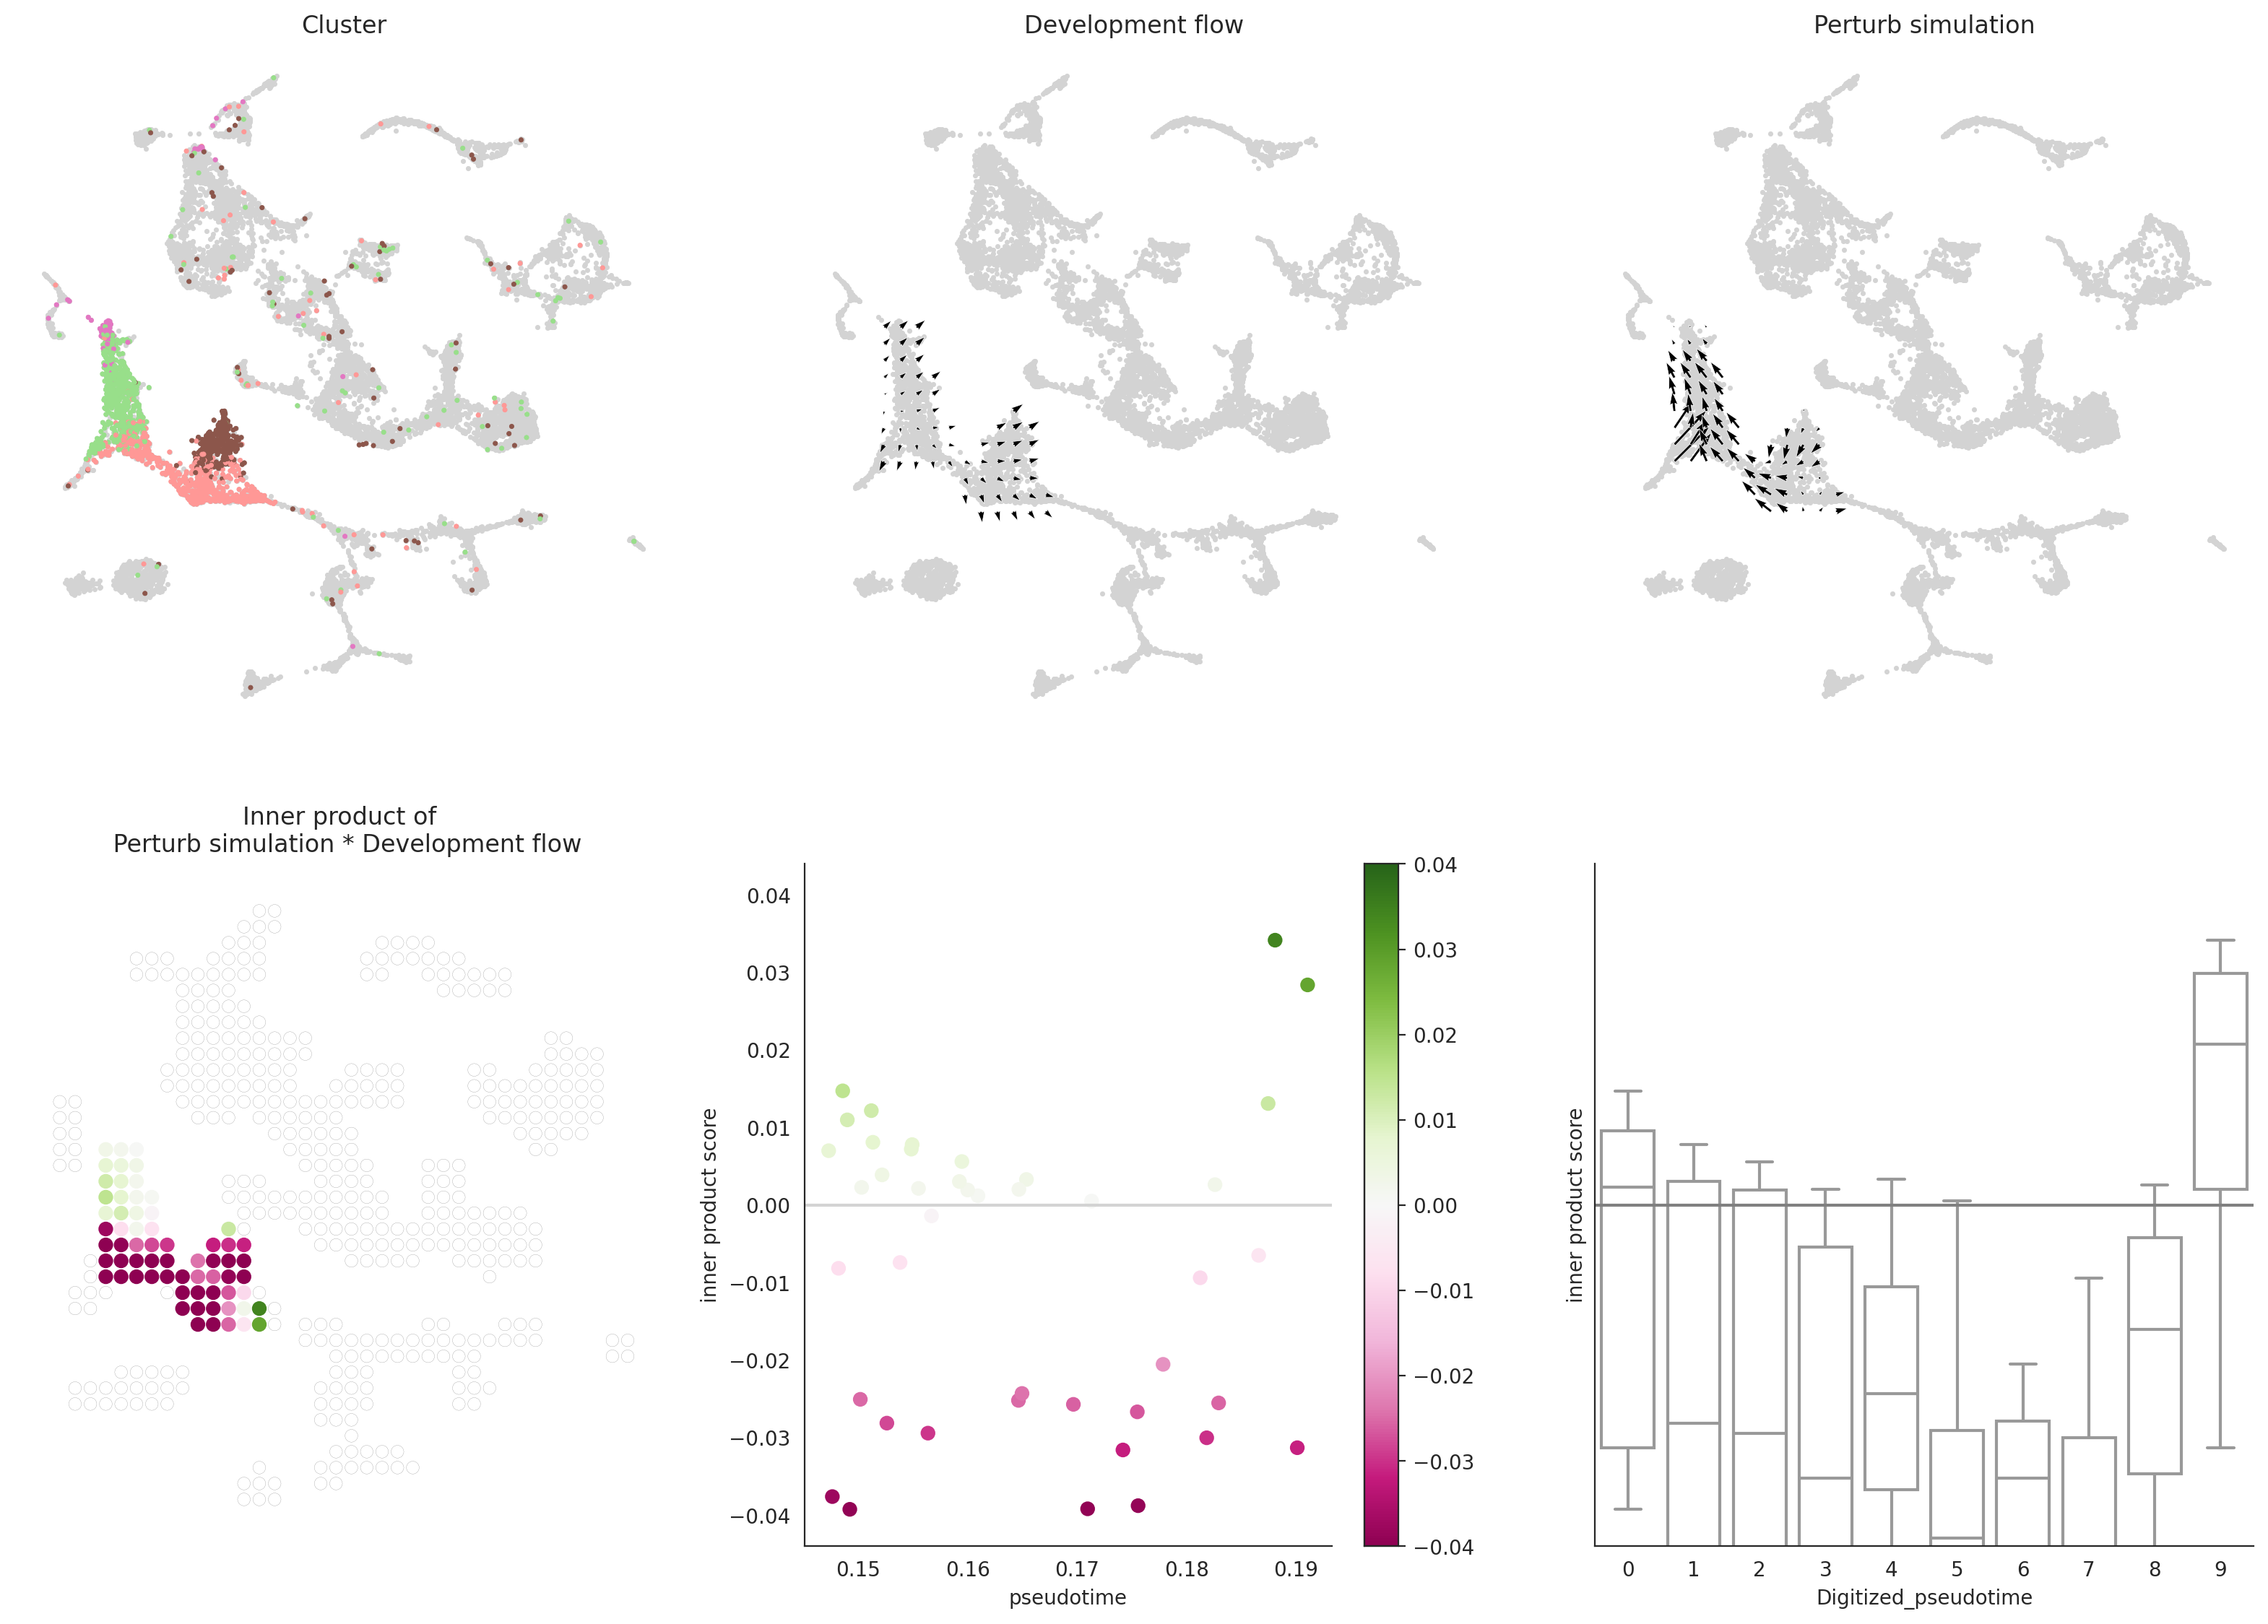

In [78]:
# based on the in silico screening above, let's look at the perturbation score on "UMAP" for a couple of candidate genes with high PS sum

# mesoderm
# Load one results
dev.load_hdf5(gene="meis1a", misc="Lineage_meso")

# Visualize result
# dev.visualize_development_module_layout_0(s=5, scale_for_simulation=0.5, s_grid=50,
#                                           scale_for_pseudotime=50, vm=0.04)
# Visualize result
dev.visualize_development_module_layout_0(s=5, scale_for_simulation=5, s_grid=40,
                                          scale_for_pseudotime=40, vm=0.04)

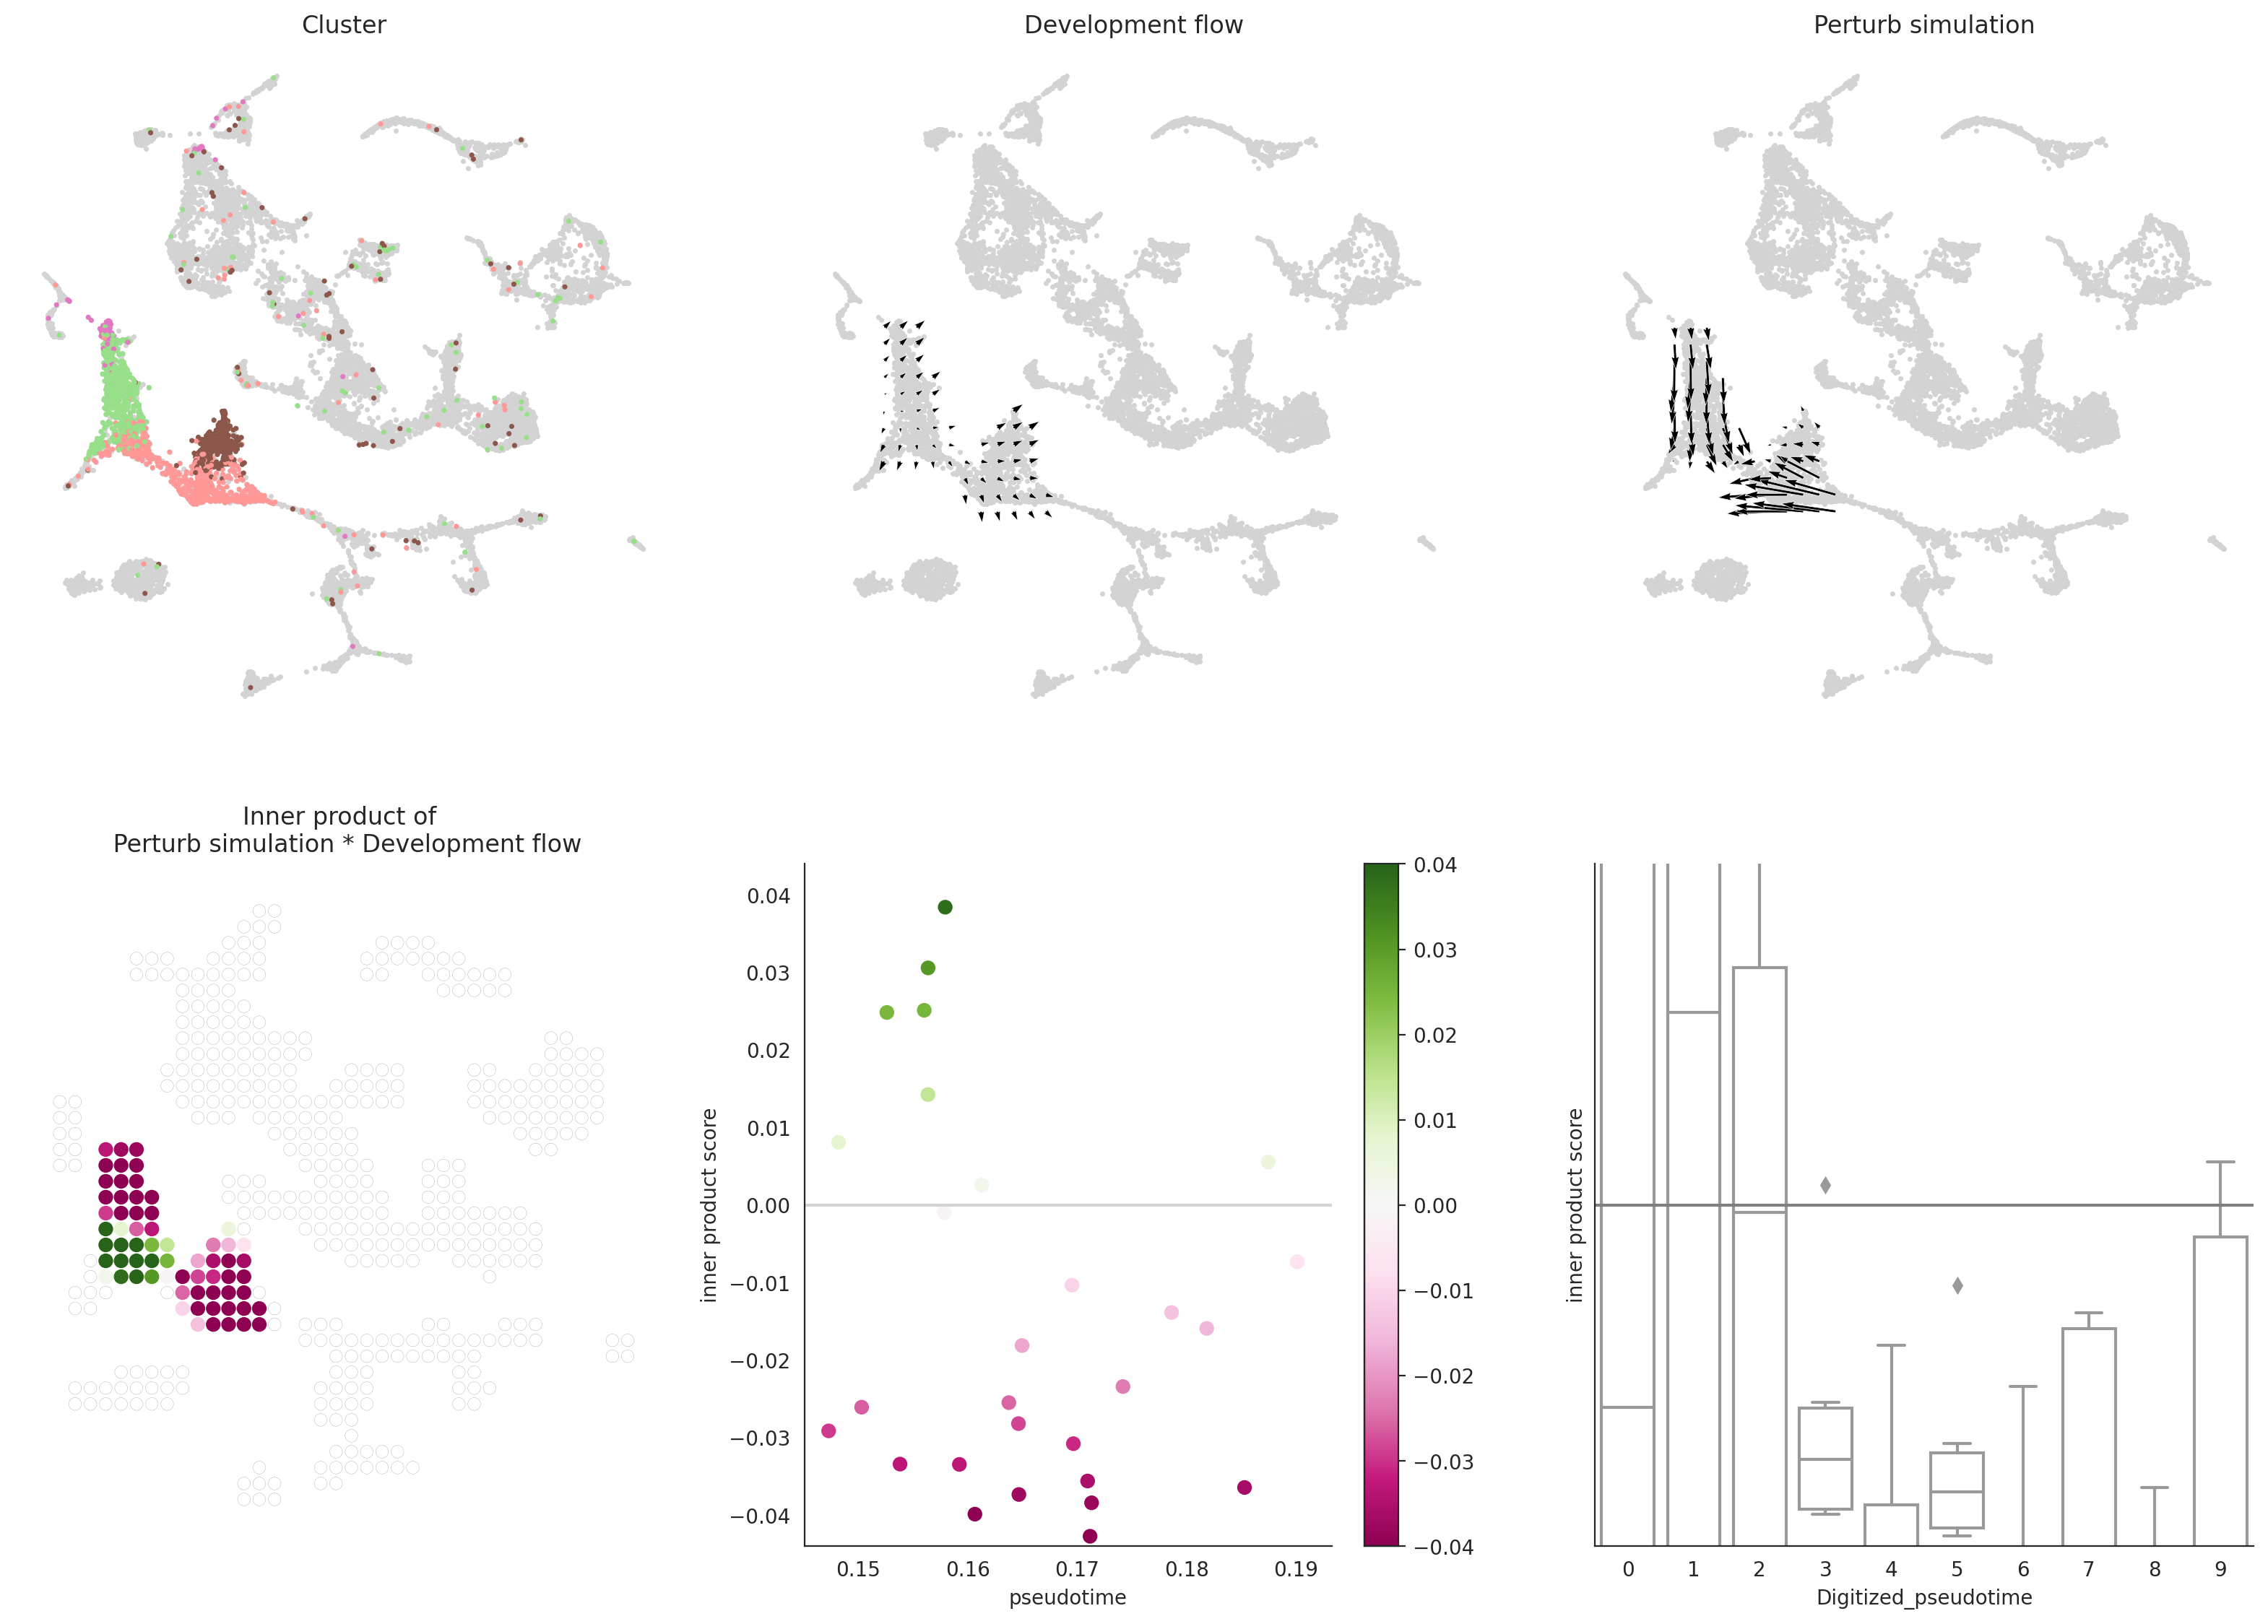

In [56]:
# based on the in silico screening above, let's look at the perturbation score on "UMAP" for a couple of candidate genes with high PS sum

# mesoderm
# Load one results
dev.load_hdf5(gene="foxp4", misc="Lineage_meso")

# Visualize result
# dev.visualize_development_module_layout_0(s=5, scale_for_simulation=0.5, s_grid=50,
#                                           scale_for_pseudotime=50, vm=0.04)
# Visualize result
dev.visualize_development_module_layout_0(s=5, scale_for_simulation=5, s_grid=40,
                                          scale_for_pseudotime=40, vm=0.04)